# Final experiments: varying entrainment rate

Thomas Schanzer z5310829  
School of Physics, UNSW  
November 2021

In this notebook, we vary the entrainment rate of a parcel in a fixed, idealised sounding, for fixed initial conditions.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(
    {'font.size': 16, 'text.usetex': True, 'font.family': 'serif',
     'font.serif': ['Computer Modern Roman']})

import metpy.calc as mpcalc
from metpy.units import units
import metpy.constants as const
from metpy.units import concatenate
from metpy.plots import SkewT

import sys
from os import mkdir
from os.path import exists

sys.path.append('../../scripts/')
from environment import idealised_sounding
from thermo import moist_lapse, saturation_specific_humidity, dcape_dcin
from thermo import temperature_change
from entraining_parcel import EntrainingParcel

In [2]:
fig_path = '20211110_varying_entrainment_figures/'
if not exists(fig_path):
    mkdir(fig_path)

In [20]:
sounding = idealised_sounding(0.5)
parcel = EntrainingParcel(sounding)

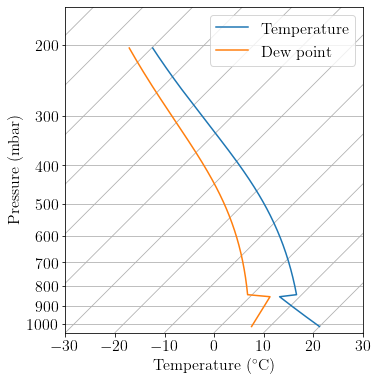

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [17]:
fig = plt.figure(figsize=(6,6))
skew = SkewT(fig, rotation=45)
skew.plot(sounding._pressure_raw, sounding._temperature_raw,
          label='Temperature')
skew.plot(sounding._pressure_raw, sounding._dewpoint_raw, label='Dew point')
lgd = skew.ax.legend()
skew.ax.set_xlim(-30, 30)
skew.ax.set_ylim(top=160)
skew.ax.set(
    xlabel='Temperature ($^\circ$C)',
    ylabel='Pressure (mbar)')
plt.show()
fig.savefig(fig_path + 'skewt.eps', facecolor='w', bbox_inches='tight')

## Experiments

In [18]:
z_initial = 5*units.km
w_initial = 0*units.meter/units.second
p_initial = sounding.pressure(z_initial)
t_initial = sounding.wetbulb_temperature(z_initial)
q_initial = saturation_specific_humidity(p_initial, t_initial)
time = np.arange(0, 10.1, 0.1)*units.minute
rates = np.arange(0, 2.1, 0.1)/units.km
l_initial = 2e-3*units.dimensionless

In [21]:
%%time
sols = []
for i, rate in enumerate(rates):
    sys.stdout.write('\rCalculation {} of {}    '.format(i+1, rates.size))
    sol = parcel.motion(
        time, z_initial, w_initial, t_initial, q_initial, l_initial, rate,
        kind='reversible')
    sols.append(sol)
sys.stdout.write('\n')

Calculation 21 of 21    
CPU times: user 7min 2s, sys: 2.69 s, total: 7min 5s
Wall time: 7min 16s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


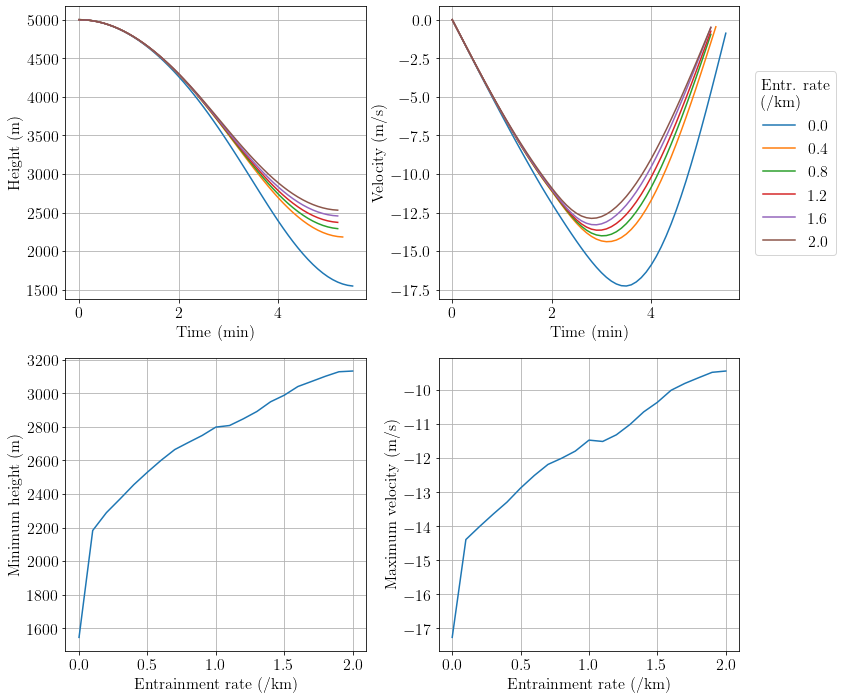

In [50]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(221)
for i, rate in enumerate(rates[::4]):
    ax.plot(time, sols[i].height)
ax.grid()
ax.set(
    xlabel='Time (min)',
    ylabel='Height (m)')

ax = fig.add_subplot(222)
for i, rate in enumerate(rates[::4]):
    ax.plot(time, sols[i].velocity, label='{:.1f}'.format(rate.m))
lgd = ax.legend(loc=[1.05, 0.15])
lgd.set_title('Entr. rate\n(/km)')
ax.grid()
ax.set(
    xlabel='Time (min)',
    ylabel='Velocity (m/s)')

ax = fig.add_subplot(223)
ax.plot(rates, [sol.min_height.m for sol in sols])
ax.grid()
ax.set(
    xlabel='Entrainment rate (/km)',
    ylabel='Minimum height (m)')

ax = fig.add_subplot(224)
ax.plot(rates, [np.nanmin(sol.velocity.m) for sol in sols])
ax.grid()
ax.set(
    xlabel='Entrainment rate (/km)',
    ylabel='Maximum velocity (m/s)')

fig.tight_layout()
fig.savefig(fig_path + 'motion_vs_entr_rate_2gram_50RH.eps', facecolor='w',
            bbox_inches='tight')
plt.show()